In [1]:
# Import statments and plot figures inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Global variables to define ranges between segments

NEVER_ORGANIC_MAX = 0.1
MID = 0.5
SUPER_ORGANIC_MIN = 0.9

# Build Organic Segment database

In [3]:
# Read in the produce dataset
organic = pd.read_csv('produce_dataset.csv')

In [4]:
organic.head()

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle
0,22742747,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits
1,4089402,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits
2,4089403,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits
3,4089404,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits
4,4089405,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits


In [5]:
# Drop the column of index from the previous table (no longer valid indices)
organic.drop('Unnamed: 0', axis =1, inplace=True)

In [6]:
# Dataset is ordered by user_id
organic.head(30)

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits
5,2,1,2168274,2,11,NaN,47766,Organic Avocado,2,0,24,fresh fruits
6,2,1,2168274,2,11,NaN,27966,Organic Raspberries,11,0,123,packaged vegetables fruits
7,2,1,2168274,2,11,NaN,13176,Bag of Organic Bananas,12,0,24,fresh fruits
8,2,1,2168274,2,11,NaN,45066,Honeycrisp Apple,13,0,24,fresh fruits
9,2,2,1501582,5,10,10.0,16797,Strawberries,1,0,24,fresh fruits


In [7]:
# Initialize a total_produce_purchased column with all 1's 
organic['total_produce_purchased'] = 1
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1


In [8]:
# Group the rows by user_id and add the previously initialized total_produce_purchased column (each row is 1)
# This returns a series with user_id, total_produce_purchased
user_total = organic.groupby('user_id')['total_produce_purchased'].sum()
user_total

user_id
1           5
2          43
3          38
4           2
5          23
         ... 
206205     14
206206     34
206207     50
206208    197
206209     20
Name: total_produce_purchased, Length: 194331, dtype: int64

In [9]:
# Create a organic? column containing 1 for an organic produce, 0 for a non-organic produce
organic['organic?'] = organic['product_name'].str.contains('Organic').astype(int)
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased,organic?
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0


In [10]:
# This returns a series with user_id, organic?
user_organic = organic.groupby('user_id')['organic?'].sum()
user_organic

user_id
1           3
2          21
3          23
4           2
5          15
         ... 
206205      7
206206     27
206207     47
206208    154
206209      9
Name: organic?, Length: 194331, dtype: int32

In [11]:
# Combine the total and organic series into one dataframe (user_id, total_orders, organic?)
user_df = pd.concat([user_total, user_organic], axis=1).reset_index()
user_df

,user_id,total_produce_purchased,organic?
0,1,5,3
1,2,43,21
2,3,38,23
3,4,2,2
4,5,23,15
...,...,...,...
194326,206205,14,7
194327,206206,34,27
194328,206207,50,47
194329,206208,197,154


In [12]:
# Rename the organic? column to 'organic_produce_purchased'
user_df.rename(columns = {'organic?':'organic_produce_purchased'}, inplace = True) 
user_df

,user_id,total_produce_purchased,organic_produce_purchased
0,1,5,3
1,2,43,21
2,3,38,23
3,4,2,2
4,5,23,15
...,...,...,...
194326,206205,14,7
194327,206206,34,27
194328,206207,50,47
194329,206208,197,154


In [13]:
# Create a new 'organic_%' column that is the percentage of organic produce purchased over total produce purchased
user_df['organic_%'] = user_df['organic_produce_purchased']/user_df['total_produce_purchased']
user_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%
0,1,5,3,0.600000
1,2,43,21,0.488372
2,3,38,23,0.605263
3,4,2,2,1.000000
4,5,23,15,0.652174
...,...,...,...,...
194326,206205,14,7,0.500000
194327,206206,34,27,0.794118
194328,206207,50,47,0.940000
194329,206208,197,154,0.781726


In [14]:
# Create a new 'segment' column and initialize it with None
user_df['segment'] = np.NaN

# Set up the user segments per the percentage ranges below and assign the values to the 'segment' column
user_df.loc[user_df['organic_%'] < NEVER_ORGANIC_MAX, 'segment'] = 'Never Organic'
user_df.loc[(user_df['organic_%'] >= NEVER_ORGANIC_MAX) & (user_df['organic_%'] < MID), 'segment'] = 'Organic Taster'
user_df.loc[(user_df['organic_%'] >= MID) & (user_df['organic_%'] < SUPER_ORGANIC_MIN), 'segment'] = 'Moderate Organic'
user_df.loc[user_df['organic_%'] >= SUPER_ORGANIC_MIN, 'segment'] = 'Super Organic'
user_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment
0,1,5,3,0.600000,Moderate Organic
1,2,43,21,0.488372,Organic Taster
2,3,38,23,0.605263,Moderate Organic
3,4,2,2,1.000000,Super Organic
4,5,23,15,0.652174,Moderate Organic
...,...,...,...,...,...
194326,206205,14,7,0.500000,Moderate Organic
194327,206206,34,27,0.794118,Moderate Organic
194328,206207,50,47,0.940000,Super Organic
194329,206208,197,154,0.781726,Moderate Organic


In [15]:
# merge organic df (that has all produce purchases) with user_df that has user defined segment and other variables
a = pd.merge(organic, user_df, how='left', left_on = 'user_id', right_on = 'user_id')
a

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased_x,organic?,total_produce_purchased_y,organic_produce_purchased,organic_%,segment
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1,5,3,0.60,Moderate Organic
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1,5,3,0.60,Moderate Organic
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0,5,3,0.60,Moderate Organic
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0,5,3,0.60,Moderate Organic
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1,5,3,0.60,Moderate Organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1,20,9,0.45,Organic Taster
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0,20,9,0.45,Organic Taster
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0,20,9,0.45,Organic Taster
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0,20,9,0.45,Organic Taster


In [17]:
# Rename the organic? and total_produce_purchased_x columns because they are in fact flags (0 or 1)
a.rename(columns = {'organic?':'organic_item_flag', 'total_produce_purchased_x':'produce_item_flag', 'total_produce_purchased_y': 'cust_total_produce_purchased', 'organic_produce_purchased':'cust_organic_produce_purchased'}, inplace = True) 
a.head()

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,produce_item_flag,organic_item_flag,cust_total_produce_purchased,cust_organic_produce_purchased,organic_%,segment
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1,5,3,0.6,Moderate Organic
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1,5,3,0.6,Moderate Organic
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0,5,3,0.6,Moderate Organic
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0,5,3,0.6,Moderate Organic
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1,5,3,0.6,Moderate Organic


# Sanity Check the two dataframes

In [18]:
def count_check (group1, group2, var_list):
    for item in var_list:
        x = group1[item].count()
        y = group2[item].count()
        print(item, "check is", x, 'and', y)
    return

def nunique_check (group1, group2, item):
    for item in var_list:
        x = group1[item].nunique()
        y = group2[item].nunique()
        print(item, "check is", x, 'and', y)
    return

def sum_check (group1, group2, item):
    for item in var_list:
        x = group1[item].sum()
        y = group2[item].sum()
        print(item, "check is", x, 'and', y)
    return

In [19]:
var_list = ['user_id', 'order_id', 'product_id']
count_check(a, organic, var_list)
nunique_check(a, organic, var_list)
sum_check(a, organic, var_list)

user_id check is 9888378 and 9888378
order_id check is 9888378 and 9888378
product_id check is 9888378 and 9888378
user_id check is 194331 and 194331
order_id check is 2506247 and 2506247
product_id check is 1684 and 1684
user_id check is 1017006264372 and 1017006264372
order_id check is 16912722853803 and 16912722853803
product_id check is 268606793046 and 268606793046


In [20]:
# Create the produce only csv
a.to_csv('produce_dataset_segments.csv')

# Customer Segment Analysis

In [21]:
# create a df that is grouped by organic segment
by_segment = a.groupby('segment')
by_segment

In [22]:
# build dictionary of functions to aggregate onto by_segment for analysis
func_dict = {'user_id':'nunique', 'order_id':'nunique', 'produce_item_flag':'sum', 'organic_item_flag':'sum', 
             'reordered':'sum', 'days_since_prior_order':'mean', 'order_dow':'mean', 'order_hour_of_day':'mean'}

In [23]:
# apply function dicitonary to by_segment
segment_behavior_df = by_segment.agg(func_dict)
segment_behavior_df

,user_id,order_id,produce_item_flag,organic_item_flag,reordered,days_since_prior_order,order_dow,order_hour_of_day
segment,,,,,,,,
Moderate Organic,80773,1243649,5464438,3749744,3624289,10.635955,2.660799,13.463987
Never Organic,29939,227935,584082,24006,361230,12.533156,2.752668,13.346869
Organic Taster,70338,902466,3392731,1129591,2131120,11.767191,2.697992,13.380276
Super Organic,13281,132197,447127,420283,315957,10.194094,2.708412,13.512136


In [24]:
# add two columns: (1) calculate the shopping cart size and (2) How % of produce items that are re-ordered
segment_behavior_df['avg_order_count'] = segment_behavior_df['order_id']/segment_behavior_df['user_id']
segment_behavior_df['avg_order_size'] = segment_behavior_df['produce_item_flag']/segment_behavior_df['order_id']
segment_behavior_df['product_reorder_%'] = segment_behavior_df['reordered']/segment_behavior_df['produce_item_flag']
segment_behavior_df

,user_id,order_id,produce_item_flag,organic_item_flag,reordered,days_since_prior_order,order_dow,order_hour_of_day,avg_order_count,avg_order_size,product_reorder_%
segment,,,,,,,,,,,
Moderate Organic,80773,1243649,5464438,3749744,3624289,10.635955,2.660799,13.463987,15.396841,4.393875,0.663250
Never Organic,29939,227935,584082,24006,361230,12.533156,2.752668,13.346869,7.613314,2.562494,0.618458
Organic Taster,70338,902466,3392731,1129591,2131120,11.767191,2.697992,13.380276,12.830419,3.759400,0.628143
Super Organic,13281,132197,447127,420283,315957,10.194094,2.708412,13.512136,9.953844,3.382278,0.706638


In [25]:
#clean up dataframe columns by dropping ones not needed for final chart
segment_behavior_final_df = segment_behavior_df.drop(['user_id','order_id', 'produce_item_flag', 'organic_item_flag', 'reordered', 'product_reorder_%', 'order_dow', 'order_hour_of_day'], axis=1) 
segment_behavior_final_df                                                  

,days_since_prior_order,avg_order_count,avg_order_size
segment,,,
Moderate Organic,10.635955,15.396841,4.393875
Never Organic,12.533156,7.613314,2.562494
Organic Taster,11.767191,12.830419,3.759400
Super Organic,10.194094,9.953844,3.382278


In [26]:
segment_behavior_final_df.reset_index()
segment_behavior_final_df

,days_since_prior_order,avg_order_count,avg_order_size
segment,,,
Moderate Organic,10.635955,15.396841,4.393875
Never Organic,12.533156,7.613314,2.562494
Organic Taster,11.767191,12.830419,3.759400
Super Organic,10.194094,9.953844,3.382278


In [27]:
# Rename the columns to explain what they actually are
segment_behavior_final_df.rename(columns = {'days_since_prior_order': 'Average # of days since last order', 
                                            'avg_order_count': 'Average # of orders', 
                                            'avg_order_size': 'Average order size'}, inplace = True)

segment_behavior_final_df

,Average # of days since last order,Average # of orders,Average order size
segment,,,
Moderate Organic,10.635955,15.396841,4.393875
Never Organic,12.533156,7.613314,2.562494
Organic Taster,11.767191,12.830419,3.759400
Super Organic,10.194094,9.953844,3.382278


In [28]:
# change index order to reflect segmentation scale: Never to Super
segment_behavior_final_df = segment_behavior_final_df.reindex(index = ['Never Organic','Organic Taster', 
                                                                       'Moderate Organic', 'Super Organic'])
segment_behavior_final_df.round(1)

,Average # of days since last order,Average # of orders,Average order size
segment,,,
Never Organic,12.5,7.6,2.6
Organic Taster,11.8,12.8,3.8
Moderate Organic,10.6,15.4,4.4
Super Organic,10.2,10.0,3.4


In [29]:
#frame = frame[['column I want first', 'column I want second'...etc.]]
segment_behavior_final_df = segment_behavior_final_df[['Average # of orders', 'Average # of days since last order', 'Average order size']]
segment_behavior_final_df.round(1)

,Average # of orders,Average # of days since last order,Average order size
segment,,,
Never Organic,7.6,12.5,2.6
Organic Taster,12.8,11.8,3.8
Moderate Organic,15.4,10.6,4.4
Super Organic,10.0,10.2,3.4


In [288]:
segment_behavior_final_df.reset_index(inplace = True, drop = True) 
segment_behavior_final_df
# segment_behavior_final_df['segment'] = segment_behavior_final_df['segment'].str.upper() 
  
# segment_behavior_final_df.head() 

,Average # of orders,Average # of days since last order,Average order size
0,7.613314,12.533156,2.562494
1,12.830419,11.767191,3.759400
2,15.396841,10.635955,4.393875
3,9.953844,10.194094,3.382278


# Final chart for Report

In [30]:
segment_behavior_final_df.round(1)

,Average # of orders,Average # of days since last order,Average order size
segment,,,
Never Organic,7.6,12.5,2.6
Organic Taster,12.8,11.8,3.8
Moderate Organic,15.4,10.6,4.4
Super Organic,10.0,10.2,3.4


# Takeaways:
Order frequency
(1) Never organics order fewer times (as seen in order number and in days since last order)
(2) Not surprisingly, Super ORganics order more often than most and with highest frequency

Order amount:
(1) Never organics also order less produce (would be good to check all products here)
(2) Super and Moderate Organics re-order the same items more often than Never.

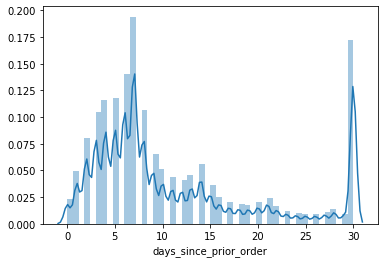

In [121]:
sns.distplot(a['days_since_prior_order'])

In [130]:
super_organic_group = by_segment.get_group('Super Organic')
moderate_organic_group = by_segment.get_group('Moderate Organic')
taster_organic_group = by_segment.get_group('Organic Taster')
never_organic_group = by_segment.get_group('Never Organic')


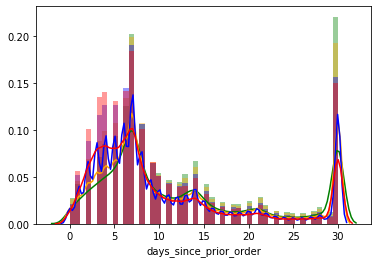

In [131]:
sns.distplot(never_organic_group['days_since_prior_order'], color = 'Green')
sns.distplot(taster_organic_group['days_since_prior_order'], color = 'Orange')
sns.distplot(moderate_organic_group['days_since_prior_order'], color = 'Blue')
sns.distplot(super_organic_group['days_since_prior_order'], color = 'Red')

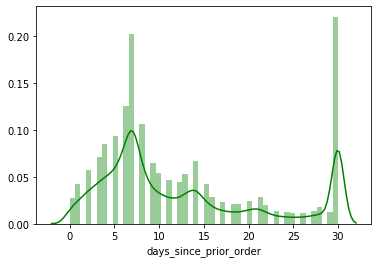

In [132]:
sns.distplot(never_organic_group['days_since_prior_order'], color = 'Green')

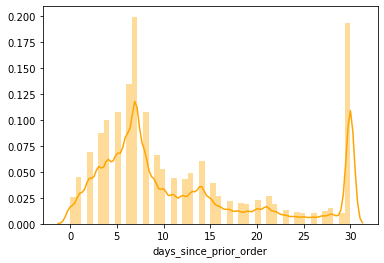

In [133]:
sns.distplot(taster_organic_group['days_since_prior_order'], color = 'Orange')

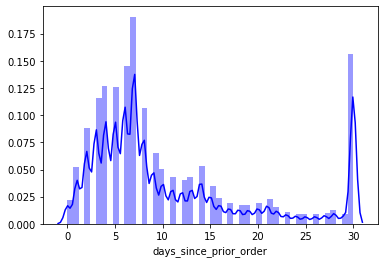

In [134]:
sns.distplot(moderate_organic_group['days_since_prior_order'], color = 'Blue')

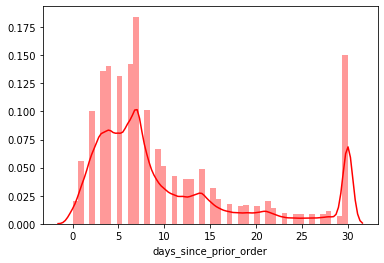

In [135]:
sns.distplot(super_organic_group['days_since_prior_order'], color = 'Red')

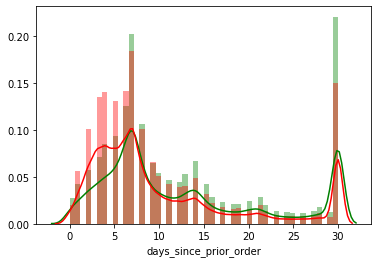

In [139]:
sns.distplot(never_organic_group['days_since_prior_order'], color = 'Green', label ='Never Organic')
sns.distplot(super_organic_group['days_since_prior_order'], color = 'Red', label = 'Super Organic')


Text(0.5, 1.0, 'Distributin of average days since prior order by Customer segment')

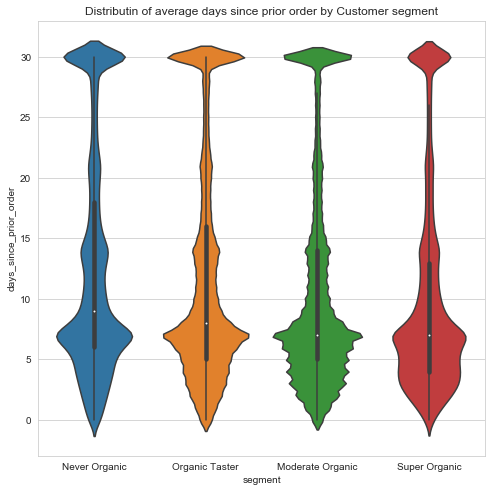

In [256]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.violinplot("segment", "days_since_prior_order", data=a, order=[ "Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], pallete = my_pal)
plt.title("Distributin of average days since prior order by Customer segment")

Text(0.5, 0, 'Segment')

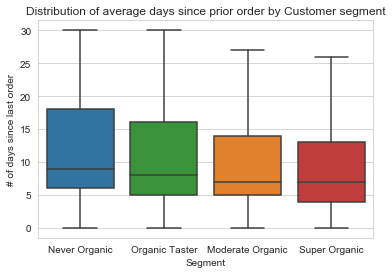

In [36]:
sns.set_style("whitegrid")
sns.boxplot(x = 'segment', y = 'days_since_prior_order', data = a, 
            order=["Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal, showfliers = False)
plt.title("Distribution of average days since prior order by Customer segment")
plt.ylabel('# of days since last order')
plt.xlabel('Segment')
# plt.ylim([0, 50])

# Make violin chart for order count, order size and reorder % by customer segment : show distribution of order

In [37]:
# Start with user_df and add a column that shows the total # of orders for each customer (nunique on order_id)
# then add a column on total # of product reorders (sum of reorder flag)
user_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment
0,1,5,3,0.600000,Moderate Organic
1,2,43,21,0.488372,Organic Taster
2,3,38,23,0.605263,Moderate Organic
3,4,2,2,1.000000,Super Organic
4,5,23,15,0.652174,Moderate Organic
...,...,...,...,...,...
194326,206205,14,7,0.500000,Moderate Organic
194327,206206,34,27,0.794118,Moderate Organic
194328,206207,50,47,0.940000,Super Organic
194329,206208,197,154,0.781726,Moderate Organic


In [38]:
# This returns a series with user_id, total of orders per user
user_orders = organic.groupby('user_id')['order_id'].nunique()
user_orders

user_id
1          2
2         15
3         12
4          1
5          5
          ..
206205     3
206206    11
206207    16
206208    45
206209    11
Name: order_id, Length: 194331, dtype: int64

In [39]:
# This returns a series with user_id, total # of reorders per user
user_reorders = organic.groupby('user_id')['reordered'].sum()
user_reorders

user_id
1           1
2          25
3          26
4           0
5          11
         ... 
206205      4
206206      7
206207     30
206208    148
206209     12
Name: reordered, Length: 194331, dtype: int64

In [40]:
# Combine the total and organic series into one dataframe (user_id, total_orders, organic?)
# merge organic df (that has all produce purchases) with user_df that has user defined segment and other variables
user_df_new = pd.merge(user_df, user_orders, how='left', left_on = 'user_id', right_on = 'user_id')
user_df_new = pd.merge(user_df_new, user_reorders, how='left', left_on = 'user_id', right_on = 'user_id')
user_df_new

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment,order_id,reordered
0,1,5,3,0.600000,Moderate Organic,2,1
1,2,43,21,0.488372,Organic Taster,15,25
2,3,38,23,0.605263,Moderate Organic,12,26
3,4,2,2,1.000000,Super Organic,1,0
4,5,23,15,0.652174,Moderate Organic,5,11
...,...,...,...,...,...,...,...
194326,206205,14,7,0.500000,Moderate Organic,3,4
194327,206206,34,27,0.794118,Moderate Organic,11,7
194328,206207,50,47,0.940000,Super Organic,16,30
194329,206208,197,154,0.781726,Moderate Organic,45,148


In [41]:
# Rename the oder_id column to total_produce_orders' & reordered to produce_items_reordered
user_df_new.rename(columns = {'order_id':'total_produce_orders', 'reordered': 'produce_items_reordered'}, inplace = True) 
user_df_new

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment,total_produce_orders,produce_items_reordered
0,1,5,3,0.600000,Moderate Organic,2,1
1,2,43,21,0.488372,Organic Taster,15,25
2,3,38,23,0.605263,Moderate Organic,12,26
3,4,2,2,1.000000,Super Organic,1,0
4,5,23,15,0.652174,Moderate Organic,5,11
...,...,...,...,...,...,...,...
194326,206205,14,7,0.500000,Moderate Organic,3,4
194327,206206,34,27,0.794118,Moderate Organic,11,7
194328,206207,50,47,0.940000,Super Organic,16,30
194329,206208,197,154,0.781726,Moderate Organic,45,148


In [42]:
user_df_new['avg_order_size'] = user_df_new['total_produce_purchased']/user_df_new['total_produce_orders']
user_df_new['avg_organic_order_size'] = user_df_new['organic_produce_purchased']/user_df_new['total_produce_orders']
user_df_new['product_reorder_%'] = user_df_new['produce_items_reordered']/user_df_new['total_produce_purchased']
user_df_new.round(2)

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment,total_produce_orders,produce_items_reordered,avg_order_size,avg_organic_order_size,product_reorder_%
0,1,5,3,0.60,Moderate Organic,2,1,2.50,1.50,0.20
1,2,43,21,0.49,Organic Taster,15,25,2.87,1.40,0.58
2,3,38,23,0.61,Moderate Organic,12,26,3.17,1.92,0.68
3,4,2,2,1.00,Super Organic,1,0,2.00,2.00,0.00
4,5,23,15,0.65,Moderate Organic,5,11,4.60,3.00,0.48
...,...,...,...,...,...,...,...,...,...,...
194326,206205,14,7,0.50,Moderate Organic,3,4,4.67,2.33,0.29
194327,206206,34,27,0.79,Moderate Organic,11,7,3.09,2.45,0.21
194328,206207,50,47,0.94,Super Organic,16,30,3.12,2.94,0.60
194329,206208,197,154,0.78,Moderate Organic,45,148,4.38,3.42,0.75


# Check that averages are the same as table above:

In [43]:
# create a df that is grouped by organic segment
by_segment_cust = user_df_new.groupby('segment')
by_segment_cust

In [44]:
# build dictionary of functions to aggregate onto by_segment for analysis
func_dict = {'user_id':'nunique', 'total_produce_purchased':'sum', 'organic_produce_purchased':'sum', 'organic_%':'mean', 
             'total_produce_orders':'sum', 'produce_items_reordered':'sum'}

In [45]:
# apply function dicitonary to by_segment
cust_segment_behavior_df = by_segment_cust.agg(func_dict)
cust_segment_behavior_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,total_produce_orders,produce_items_reordered
segment,,,,,,
Moderate Organic,80773,5464438,3749744,0.671736,1243649,3624289
Never Organic,29939,584082,24006,0.018415,227935,361230
Organic Taster,70338,3392731,1129591,0.305416,902466,2131120
Super Organic,13281,447127,420283,0.971079,132197,315957


In [184]:
# change index order to reflect segmentation scale: Never to Super
cust_segment_behavior_df = cust_segment_behavior_df.reindex(index = ['Never Organic','Organic Taster', 
                                                                       'Moderate Organic', 'Super Organic'])
cust_segment_behavior_df.round(2)

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,total_produce_orders,produce_items_reordered
segment,,,,,,
Never Organic,29939,584082,24006,0.02,227935,361230
Organic Taster,70338,3392731,1129591,0.31,902466,2131120
Moderate Organic,80773,5464438,3749744,0.67,1243649,3624289
Super Organic,13281,447127,420283,0.97,132197,315957


In [188]:
# Add same 3 columns as table above: (1) calculate the shopping cart size and (2) How % of produce items that are re-ordered
cust_segment_behavior_df['avg_order_count'] = cust_segment_behavior_df['total_produce_orders']/cust_segment_behavior_df['user_id']
cust_segment_behavior_df['avg_order_size'] = cust_segment_behavior_df['total_produce_purchased']/cust_segment_behavior_df['total_produce_orders']
cust_segment_behavior_df['product_reorder_%'] = cust_segment_behavior_df['produce_items_reordered']/cust_segment_behavior_df['total_produce_purchased']
cust_segment_behavior_df.round(2)

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,total_produce_orders,produce_items_reordered,avg_order_count,avg_order_size,product_reorder_%
segment,,,,,,,,,
Never Organic,29939,584082,24006,0.02,227935,361230,7.61,2.56,0.62
Organic Taster,70338,3392731,1129591,0.31,902466,2131120,12.83,3.76,0.63
Moderate Organic,80773,5464438,3749744,0.67,1243649,3624289,15.40,4.39,0.66
Super Organic,13281,447127,420283,0.97,132197,315957,9.95,3.38,0.71


In [189]:
segment_behavior_final_df.round(2)

,avg_days_since_prior_order,avg_order_dow,avg_order_hour_of_day,avg_order_count,avg_order_size,product_reorder_%
segment,,,,,,
Never Organic,12.53,2.75,13.35,7.61,2.56,0.62
Organic Taster,11.77,2.70,13.38,12.83,3.76,0.63
Moderate Organic,10.64,2.66,13.46,15.40,4.39,0.66
Super Organic,10.19,2.71,13.51,9.95,3.38,0.71


# Yes, the averages are the same as when pulled directly from organic df

# Plot graphs

In [32]:
my_pal = {"Never Organic": "#1F77B4", "Organic Taster": "#2CA02C", "Moderate Organic":"#FF7F0E", "Super Organic":"#D62728"}


In [46]:
df= user_df_new
df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment,total_produce_orders,produce_items_reordered,avg_order_size,avg_organic_order_size,product_reorder_%
0,1,5,3,0.600000,Moderate Organic,2,1,2.500000,1.500000,0.200000
1,2,43,21,0.488372,Organic Taster,15,25,2.866667,1.400000,0.581395
2,3,38,23,0.605263,Moderate Organic,12,26,3.166667,1.916667,0.684211
3,4,2,2,1.000000,Super Organic,1,0,2.000000,2.000000,0.000000
4,5,23,15,0.652174,Moderate Organic,5,11,4.600000,3.000000,0.478261
...,...,...,...,...,...,...,...,...,...,...
194326,206205,14,7,0.500000,Moderate Organic,3,4,4.666667,2.333333,0.285714
194327,206206,34,27,0.794118,Moderate Organic,11,7,3.090909,2.454545,0.205882
194328,206207,50,47,0.940000,Super Organic,16,30,3.125000,2.937500,0.600000
194329,206208,197,154,0.781726,Moderate Organic,45,148,4.377778,3.422222,0.751269


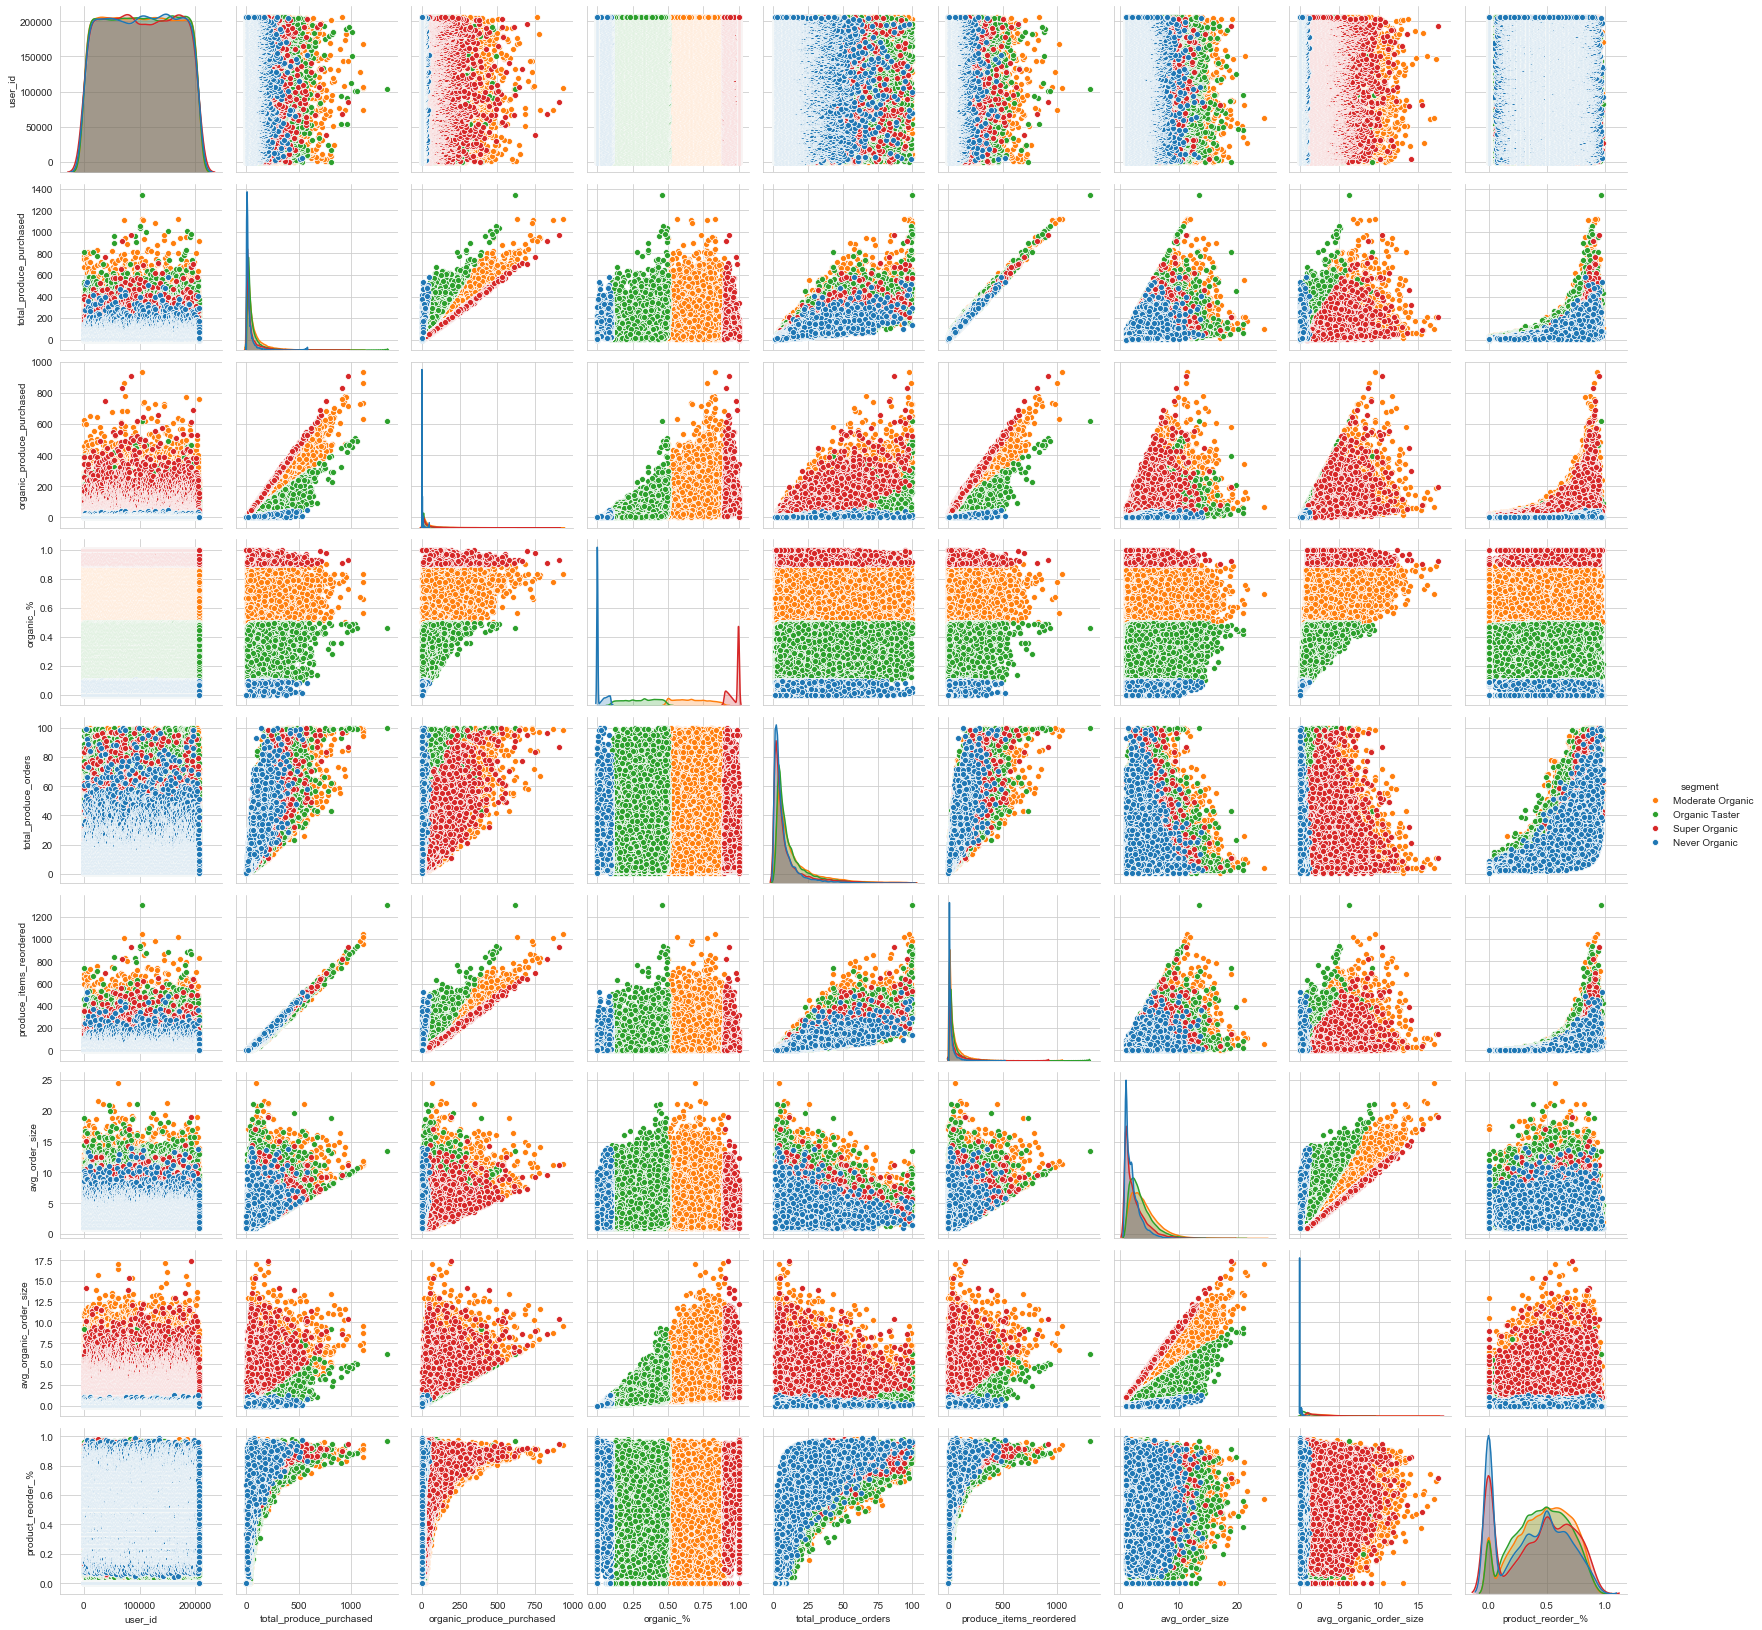

In [220]:
sns.pairplot(df, hue ="segment", palette =my_pal)

In [47]:
df.head()

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment,total_produce_orders,produce_items_reordered,avg_order_size,avg_organic_order_size,product_reorder_%
0,1,5,3,0.600000,Moderate Organic,2,1,2.500000,1.500000,0.200000
1,2,43,21,0.488372,Organic Taster,15,25,2.866667,1.400000,0.581395
2,3,38,23,0.605263,Moderate Organic,12,26,3.166667,1.916667,0.684211
3,4,2,2,1.000000,Super Organic,1,0,2.000000,2.000000,0.000000
4,5,23,15,0.652174,Moderate Organic,5,11,4.600000,3.000000,0.478261


Text(0.5, 1.0, 'Distributin of produce orders per customer by Customer segment')

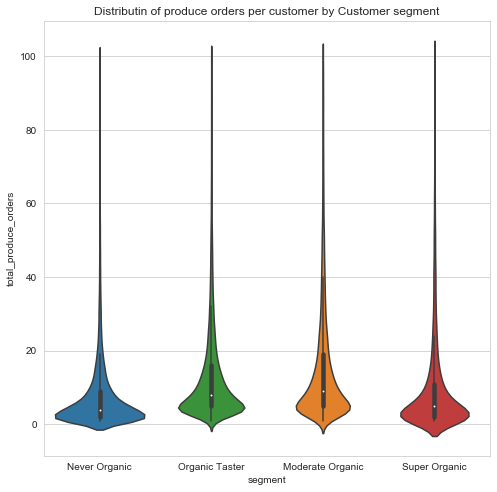

In [258]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.violinplot("segment", "total_produce_orders", data=df, order=["Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal)
plt.title("Distributin of produce orders per customer by Customer segment")
# plt.ylim([0, 40])

Text(0.5, 0, 'Segment')

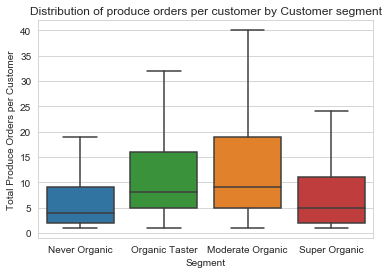

In [48]:
sns.set_style("whitegrid")
sns.boxplot(x = 'segment', y = 'total_produce_orders', data = df, 
            order=["Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal, showfliers = False)
plt.title("Distribution of produce orders per customer by Customer segment")
plt.ylabel('Total Produce Orders per Customer')
plt.xlabel('Segment')
# plt.ylim([0, 50])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.violinplot("segment", "avg_order_size", data=df, order=["Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal)
plt.title("Distributin of Order size per customer by Customer segment")
# plt.ylim([0, 40])

Text(0.5, 1.0, 'Distributin of Order size per customer by Customer segment')

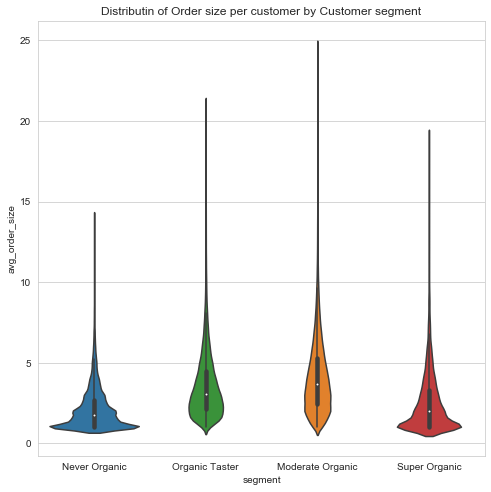

In [246]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.violinplot("segment", "avg_order_size", data=df, order=["Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal)
plt.title("Distributin of Order size per customer by Customer segment")
# plt.ylim([0, 40])

Text(0.5, 0, 'Segment')

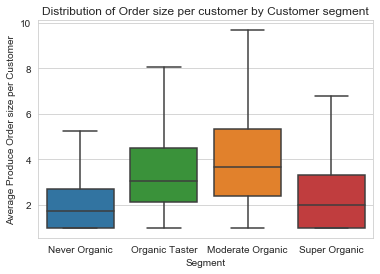

In [49]:
sns.set_style("whitegrid")
sns.boxplot(x = 'segment', y = 'avg_order_size', data = df, 
            order=["Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal, showfliers = False)
plt.title("Distribution of Order size per customer by Customer segment")
plt.ylabel('Average Produce Order size per Customer')
plt.xlabel('Segment')
#plt.ylim([0, 10])

Text(0.5, 1.0, 'Distributin of % products reordered per customer by Customer segment')

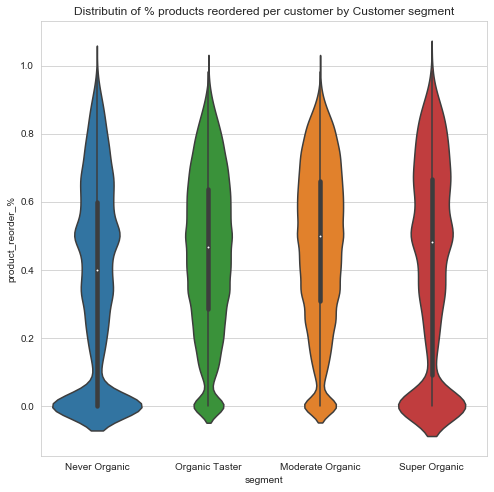

In [249]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.violinplot("segment", "product_reorder_%", data=df, order=["Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal)
plt.title("Distributin of % products reordered per customer by Customer segment")
# plt.ylim([0, 40])

Text(0.5, 1.0, 'Distributin of % products reordered per customer by Customer segment')

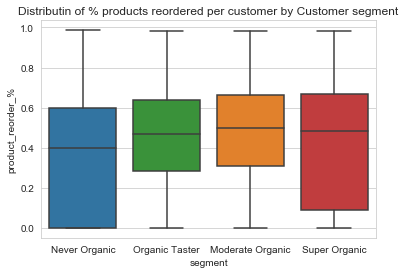

In [307]:
sns.boxplot(x = 'segment', y = 'product_reorder_%', data = df, 
            order=["Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal, showfliers = False)
plt.title("Distributin of % products reordered per customer by Customer segment")
# plt.ylim([0, 10])